In [26]:
# importing some basic libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [27]:
class SVM(object):
    def __init__(self,visualization=True, verbose=True):
        self.verbose = verbose
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self,data):
        #train with data
        self.data = data

        # { |\w\|:{w,b}}
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = np.array([])
        for yi in self.data:
            if self.verbose:
                print("init ####")
                print(all_data)
                print(self.data[yi])
            all_data = np.append(all_data,self.data[yi])
            if self.verbose:
                print(all_data)
                print("end ####")

        if self.verbose:
            print(all_data)
            print(max(all_data))
        self.max_feature_value = max(all_data)         
        self.min_feature_value = min(all_data)
        all_data = None
        
        #with smaller steps our margins and db will be more precise
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      #point of expense
                      self.max_feature_value * 0.001,]
        
        #extremly expensise
        b_range_multiple = 5
        #we dont need to take as small step as w
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        """
        objective is to satisfy yi(x.w)+b>=1 for all training dataset such that ||w|| is minimum
        for this we will start with random w, and try to satisfy it with making b bigger and bigger
        """
        #making step smaller and smaller to get precise value
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            
            #we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple,
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        #weakest link in SVM fundamentally
                        #SMO attempts to fix this a bit
                        # ti(xi.w+b) >=1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    found_option=False
                        if found_option:
                            """
                            all points in dataset satisfy y(w.x)+b>=1 for this cuurent w_t, b
                            then put w,b in dict with ||w|| as key
                            """
                            opt_dict[np.linalg.norm(w_t)]=[w_t,b]
                
                #after w[0] or w[1]<0 then values of w starts repeating itself because of transformation
                #Think about it, it is easy
                #print(w,len(opt_dict)) Try printing to understand
                if w[0]<0:
                    optimized=True
                    print("optimized a step")
                else:
                    w = w-step
                    
            # sorting ||w|| to put the smallest ||w|| at poition 0 
            norms = sorted([n for n in opt_dict])
            #optimal values of w,b
            opt_choice = opt_dict[norms[0]]

            self.w=opt_choice[0]
            self.b=opt_choice[1]
            
            #start with new latest_optimum (initial values for w)
            latest_optimum = opt_choice[0][0]+step*2
    
    def predict(self,features):
        #sign(x.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
        return (classification,np.dot(np.array(features),self.w)+self.b)
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,c=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b (actually its a line)
        # v = x0.w0+x1.w1+b -> x1 = (v-w[0].x[0]-b)/w1
        #psv = 1     psv line ->  x.w+b = 1a small value of b we will increase it later
        #nsv = -1    nsv line ->  x.w+b = -1
        # dec = 0    db line  ->  x.w+b = 0
        def hyperplane(x,w,b,v):
            #returns a x2 value on line when given x1
            return (-w[0]*x-b+v)/w[1]
       
        hyp_x_min= self.min_feature_value*0.9
        hyp_x_max = self.max_feature_value*1.1
        
        # (w.x+b)=1
        # positive support vector hyperplane
        pav1 = hyperplane(hyp_x_min,self.w,self.b,1)
        pav2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[pav1,pav2],'k')
        
        # (w.x+b)=-1
        # negative support vector hyperplane
        nav1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nav2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nav1,nav2],'k')
        
        # (w.x+b)=0
        # db support vector hyperplane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')

In [28]:
#defining a basic data
data_dict = {-1:np.array([[1,7],[2,8],[3,8]]),1:np.array([[5,1],[6,-1],[7,3]])}

init ####
[]
[[1 7]
 [2 8]
 [3 8]]
[1. 7. 2. 8. 3. 8.]
end ####
init ####
[1. 7. 2. 8. 3. 8.]
[[ 5  1]
 [ 6 -1]
 [ 7  3]]
[ 1.  7.  2.  8.  3.  8.  5.  1.  6. -1.  7.  3.]
end ####
[ 1.  7.  2.  8.  3.  8.  5.  1.  6. -1.  7.  3.]
8.0
optimized a step
optimized a step
optimized a step


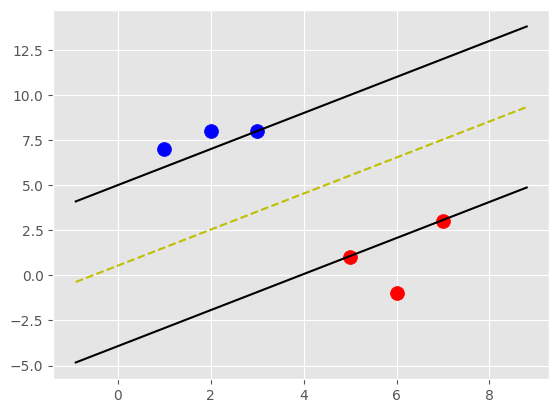

In [29]:
svm = SVM() # Linear Kernel
svm.fit(data=data_dict)
svm.visualize()

In [30]:
svm.predict([3,8])

(-1.0, -1.000000000000098)